In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import plotly.express as px
from google.colab import drive
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! mkdir ~/.kaggle

In [6]:
! cp /content/drive/MyDrive/Kaggle_API_Credentials/kaggle.json ~/.kaggle/kaggle.json

In [7]:
!ls ~/.kaggle -a

.  ..  kaggle.json


In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download ashfakyeafi/air-passenger-data-for-time-series-analysis

  0% 0.00/764 [00:00<?, ?B/s]
100% 764/764 [00:00<00:00, 1.99MB/s]


In [10]:
!unzip air-passenger-data-for-time-series-analysis.zip

Archive:  air-passenger-data-for-time-series-analysis.zip
  inflating: AirPassengers.csv       


In [13]:
data = pd.read_csv("AirPassengers.csv",parse_dates=["Month"],index_col=['Month'])

In [14]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
px.line(data,x=data.index,y="#Passengers",labels={'index':"Date","#Passengers":"Passengers"})

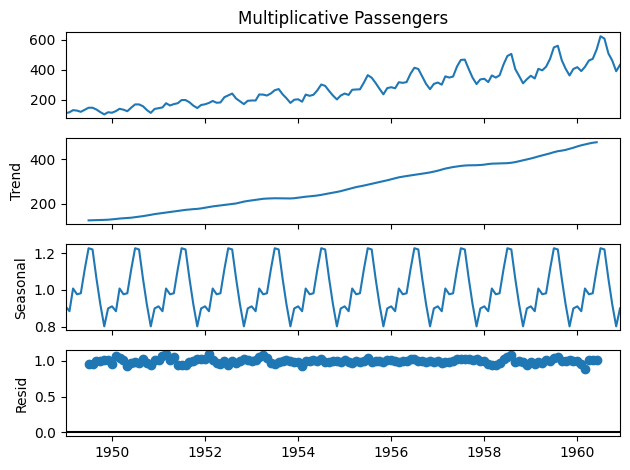

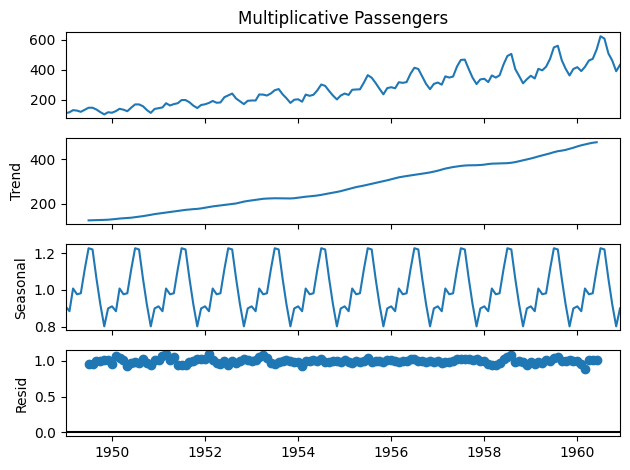

In [17]:
data.rename({"#Passengers":"Multiplicative Passengers"},axis=1,inplace=True)
seasonal = seasonal_decompose(data["Multiplicative Passengers"],model='multiplicative')
seasonal.plot()

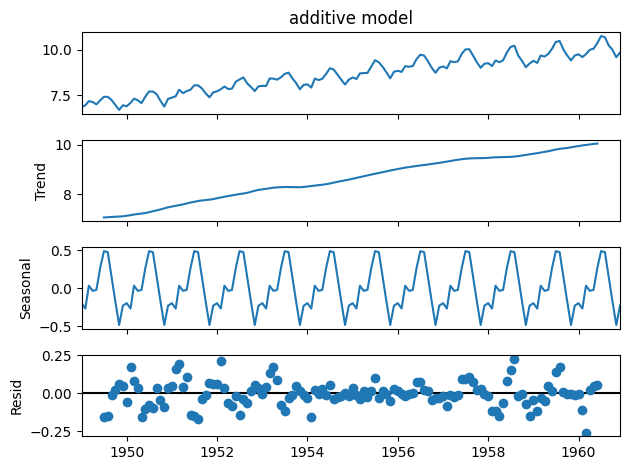

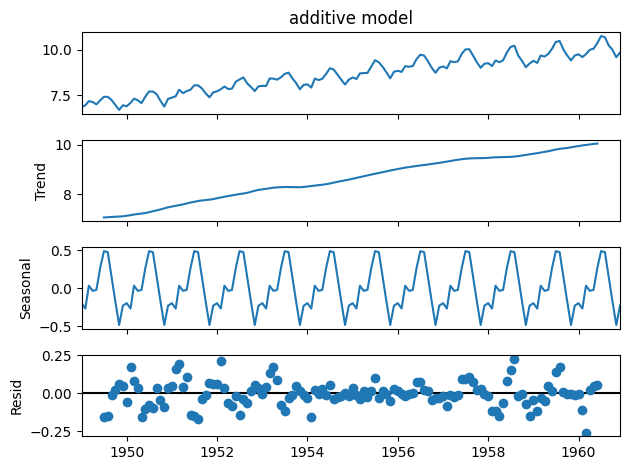

In [27]:
from scipy.stats import boxcox
data["additive model"],lam = boxcox(data["Multiplicative Passengers"])
addi = seasonal_decompose(data["additive model"],model='additive')
addi.plot()